In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)

import itertools as it
from collections import Counter, defaultdict, deque
from toolz.curried import *
from weather import TornadoEnv
from exact import solve

In [73]:
env = TornadoEnv(n_city=3, evac_cost=1, false_neg_cost=20, max_sims=20)
Q, V, pi, info = solve(env)
V(env.init)

-0.8566211875799175

In [76]:
from policies import Policy
class NoMetareasonPolicy(Policy):
    """Distributes computations uniformly"""

    def act(self, state):
        if len(self.env.actions(state)) == 1:
            return self.env.term_action
        else:
            return min(range(len(state)), key=lambda i: sum(state[i]))
        
env2 = TornadoEnv(n_city=3, evac_cost=1, false_neg_cost=20, max_sims=60)
df2 = pd.DataFrame(Agent(env2, NoMetareasonPolicy()).run_many(5000))
df2['return'].mean()

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

-1.0336445216750478

In [28]:
def data():
    for i in range(10000):
        env.reset()
        yield env.true_term_reward(env.init)
    
np.mean(list(data()))

-3.0

In [61]:
from policies import FunctionPolicy
from agents import Agent, run_episode

df = pd.DataFrame(Agent(env, FunctionPolicy(pi)).run_many(5000))
df['return'].mean()

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

-1.3076061634918716

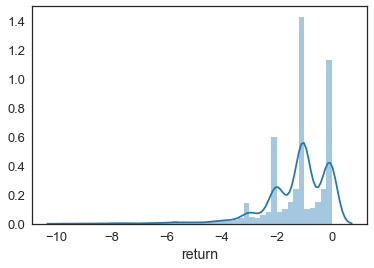

In [48]:
sns.distplot(df['return'])

In [91]:
df2.n_steps.value_counts()

21    10000
Name: n_steps, dtype: int64

In [52]:
from policies import FixedPlanPolicy
no_mr = FixedPlanPolicy(it.cycle())

,finished,i_episode,last,n_steps,return
1,True,1,"((0.1, 7.9), (0.1, 6.9), (1.1, 1.9), (1.1, 2.9))",19,-2.500000
3,True,3,"((1.1, 3.9), (2.1, 0.9), (1.1, 3.9), (0.1, 4.9))",15,-3.133333
31,True,31,"((1.1, 0.9), (1.1, 0.9), (0.1, 12.9), (1.1, 1.9))",17,-3.133333
44,True,44,"((0.1, 7.9), (1.1, 2.9), (1.1, 1.9), (0.1, 6.9))",19,-2.500000
50,True,50,"((1.1, 6.9), (1.1, 0.9), (0.1, 4.9), (1.1, 1.9))",15,-3.250000
149,True,149,"((1.1, 1.9), (1.1, 7.9), (0.1, 5.9), (1.1, 0.9))",17,-3.250000
167,True,167,"((1.1, 5.9), (1.1, 0.9), (1.1, 2.9), (0.1, 4.9))",15,-3.250000
257,True,257,"((1.1, 1.9), (0.1, 5.9), (1.1, 4.9), (1.1, 3.9))",17,-3.250000
269,True,269,"((1.1, 3.9), (2.1, 0.9), (1.1, 3.9), (0.1, 4.9))",15,-3.133333
280,True,280,"((1.1, 1.9), (0.1, 8.9), (1.1, 2.9), (1.1, 2.9))",17,-3.181818


In [34]:
df

,finished,i_episode,n_steps,return
0,True,0,5,-1.333333
1,True,1,5,-1.333333
2,True,2,5,-2.000000
3,True,3,5,-1.333333
4,True,4,5,-1.333333
5,True,5,5,-1.333333
6,True,6,5,-1.833333
7,True,7,5,-1.333333
8,True,8,5,-1.333333
9,True,9,5,-1.833333


In [11]:
data

{'finished': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  Tr

In [2]:
def value(**kwargs):
    env = TornadoEnv(**kwargs)
    Q, V, pi, info = solve(env)
    return V(env.init)

vs = [value(n_city=3, evac_cost=1, false_neg_cost=20, max_sims=ms)
      for ms in range(20)]

KeyboardInterrupt: 